# Balanço Hídrico


In [1]:
import pandas as pd
import numpy as np

## Criando a tabela do exercício

In [2]:
tabela = {'Data':[], 'ETo':[], 'Prec':[], 'Irrig':[]}

In [3]:
tabela = pd.DataFrame(tabela)

## Adicionando as datas

In [4]:
datas = []
for c in range(20, 29):
    datas.append(str(f'{c}/02'))
for c in range(1,4):
    datas.append(str(f'{c}/03'))
tabela['Data'] = datas

## Adicionando os valores de ETo

In [5]:
eto = [3.3,3.1,5.1,5.1,4.8,5.2,4.9,5.1,5.0,4.8,5.0,5.1]
tabela['ETo'] = eto

## Adicionando os valores de Precipitação (mm)

In [6]:
prec = [0,0,0,7.8,0,0,0,0,0,0,23.5,0]
tabela['Prec'] = prec

## Checando a tabela

In [7]:
tabela.head()

,Data,ETo,Prec,Irrig
0,20/02,3.3,0.0,NaN
1,21/02,3.1,0.0,NaN
2,22/02,5.1,0.0,NaN
3,23/02,5.1,7.8,NaN
4,24/02,4.8,0.0,NaN


## Adicionando o Kc do feijão no estádio de reprodução, que é igual a 1,05

In [8]:
#kc do feijão é igual a 1.05 no estadio reprodutivo
kc = []
for c in range(0, len(prec)):
    kc.append(1.05)
tabela['Kc'] = kc

## Calculando a evapotranspiração máxima, ETm

In [9]:
etm = []
for x,y in zip(tabela['ETo'], tabela['Kc']):
    etm.append(x*y)
tabela['ETm'] = etm
tabela

,Data,ETo,Prec,Irrig,Kc,ETm
0,20/02,3.3,0.0,NaN,1.05,3.465
1,21/02,3.1,0.0,NaN,1.05,3.255
2,22/02,5.1,0.0,NaN,1.05,5.355
3,23/02,5.1,7.8,NaN,1.05,5.355
4,24/02,4.8,0.0,NaN,1.05,5.040
5,25/02,5.2,0.0,NaN,1.05,5.460
6,26/02,4.9,0.0,NaN,1.05,5.145
7,27/02,5.1,0.0,NaN,1.05,5.355
8,28/02,5.0,0.0,NaN,1.05,5.250
9,1/03,4.8,0.0,NaN,1.05,5.040


## Definindo a Capacidade de Campo e criando a coluna ARMi

In [10]:
capacidade_campo = 16
armi = []
armi.append(capacidade_campo)
for c in range(1,len(etm)):
    armi.append(np.nan)
tabela['ARMi'] = armi
tabela

,Data,ETo,Prec,Irrig,Kc,ETm,ARMi
0,20/02,3.3,0.0,NaN,1.05,3.465,16.0
1,21/02,3.1,0.0,NaN,1.05,3.255,NaN
2,22/02,5.1,0.0,NaN,1.05,5.355,NaN
3,23/02,5.1,7.8,NaN,1.05,5.355,NaN
4,24/02,4.8,0.0,NaN,1.05,5.040,NaN
5,25/02,5.2,0.0,NaN,1.05,5.460,NaN
6,26/02,4.9,0.0,NaN,1.05,5.145,NaN
7,27/02,5.1,0.0,NaN,1.05,5.355,NaN
8,28/02,5.0,0.0,NaN,1.05,5.250,NaN
9,1/03,4.8,0.0,NaN,1.05,5.040,NaN


## Calculando ARMi e o quanto devo irrigar (Irrig) em mm

In [11]:
for c in range(0, len(etm)):
    if tabela.loc[c,'Prec'] == 0 or tabela.loc[c,'Irrig'] == 0:
        tabela.loc[c+1, 'ARMi'] = (round(tabela.loc[c,'ARMi'] - tabela.loc[c,'ETm'],2))
        if tabela.loc[c, 'ARMi'] > 2:
            tabela.loc[c, 'Irrig'] = 0
        else:
            tabela.loc[c, 'Irrig'] = capacidade_campo
            
    if tabela.loc[c+1, 'Prec'] != 0:
        tabela.loc[c+1, 'ARMi'] = (round(tabela.loc[c,'ARMi'] + tabela.loc[c,'Prec'] - tabela.loc[c,'ETm'],2))
        if tabela.loc[c, 'ARMi'] > 2:
            tabela.loc[c, 'Irrig'] = 0
        else:
            tabela.loc[c, 'Irrig'] = capacidade_campo
    
    if tabela.loc[c+1, 'Irrig'] != 0:
        tabela.loc[c+1, 'ARMi'] = (round(tabela.loc[c,'ARMi'] + tabela.loc[c,'Irrig'] - tabela.loc[c,'ETm'],2))
        if tabela.loc[c, 'ARMi'] > 2:
            tabela.loc[c, 'Irrig'] = 0
        else:
            tabela.loc[c, 'Irrig'] = capacidade_campo
    
    if tabela.loc[c+1, 'Irrig'] != 0 and tabela.loc[c,'Prec'] != 0 :
        tabela.loc[c+1, 'ARMi'] = (round(tabela.loc[c,'ARMi'] + tabela.loc[c,'Prec'] +tabela.loc[c,'Irrig'] - tabela.loc[c,'ETm'],2))
        if tabela.loc[c, 'ARMi'] > 2:
            tabela.loc[c, 'Irrig'] = 0
        else:
            tabela.loc[c, 'Irrig'] = capacidade_campo
    
    if tabela.loc[c+1, 'ARMi'] > capacidade_campo:
        tabela.loc[c+1, 'ARMi'] = capacidade_campo
        
    
tabela = tabela.loc[:tabela.shape[0]-2]

## Checando a tabela

In [12]:
tabela

,Data,ETo,Prec,Irrig,Kc,ETm,ARMi
0,20/02,3.3,0.0,0.0,1.05,3.465,16.00
1,21/02,3.1,0.0,0.0,1.05,3.255,12.54
2,22/02,5.1,0.0,0.0,1.05,5.355,9.28
3,23/02,5.1,7.8,0.0,1.05,5.355,3.92
4,24/02,4.8,0.0,0.0,1.05,5.040,6.36
5,25/02,5.2,0.0,16.0,1.05,5.460,1.32
6,26/02,4.9,0.0,0.0,1.05,5.145,11.86
7,27/02,5.1,0.0,0.0,1.05,5.355,6.71
8,28/02,5.0,0.0,16.0,1.05,5.250,1.36
9,1/03,4.8,0.0,0.0,1.05,5.040,12.11


## Criando e calculando a coluna ARMf

In [13]:
armf = []
for x,y,z,w in zip(tabela['Prec'],tabela['Irrig'],tabela['ARMi'],tabela['ETm']):
    if x+y+z-w > capacidade_campo:
        armf.append(capacidade_campo)
    else:
        armf.append(round(x+y+z-w,2))
tabela['ARMf'] = armf
tabela

C:\Users\joaovitor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Data,ETo,Prec,Irrig,Kc,ETm,ARMi,ARMf
0,20/02,3.3,0.0,0.0,1.05,3.465,16.00,12.54
1,21/02,3.1,0.0,0.0,1.05,3.255,12.54,9.28
2,22/02,5.1,0.0,0.0,1.05,5.355,9.28,3.92
3,23/02,5.1,7.8,0.0,1.05,5.355,3.92,6.36
4,24/02,4.8,0.0,0.0,1.05,5.040,6.36,1.32
5,25/02,5.2,0.0,16.0,1.05,5.460,1.32,11.86
6,26/02,4.9,0.0,0.0,1.05,5.145,11.86,6.71
7,27/02,5.1,0.0,0.0,1.05,5.355,6.71,1.36
8,28/02,5.0,0.0,16.0,1.05,5.250,1.36,12.11
9,1/03,4.8,0.0,0.0,1.05,5.040,12.11,7.07


## Criando e calculando a coluna Exc (excesso)

In [14]:
exc = []
for x,y,z,w in zip(tabela['Prec'],tabela['Irrig'],tabela['ARMi'],tabela['ETm']):
    if x+y+z-w <= 16:
        exc.append(0)
    else:
        exc.append(x+y+z-w-16)
tabela['Exc'] = exc
tabela

C:\Users\joaovitor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Data,ETo,Prec,Irrig,Kc,ETm,ARMi,ARMf,Exc
0,20/02,3.3,0.0,0.0,1.05,3.465,16.00,12.54,0.00
1,21/02,3.1,0.0,0.0,1.05,3.255,12.54,9.28,0.00
2,22/02,5.1,0.0,0.0,1.05,5.355,9.28,3.92,0.00
3,23/02,5.1,7.8,0.0,1.05,5.355,3.92,6.36,0.00
4,24/02,4.8,0.0,0.0,1.05,5.040,6.36,1.32,0.00
5,25/02,5.2,0.0,16.0,1.05,5.460,1.32,11.86,0.00
6,26/02,4.9,0.0,0.0,1.05,5.145,11.86,6.71,0.00
7,27/02,5.1,0.0,0.0,1.05,5.355,6.71,1.36,0.00
8,28/02,5.0,0.0,16.0,1.05,5.250,1.36,12.11,0.00
9,1/03,4.8,0.0,0.0,1.05,5.040,12.11,7.07,0.00


## Plotando alguns valores da Tabela

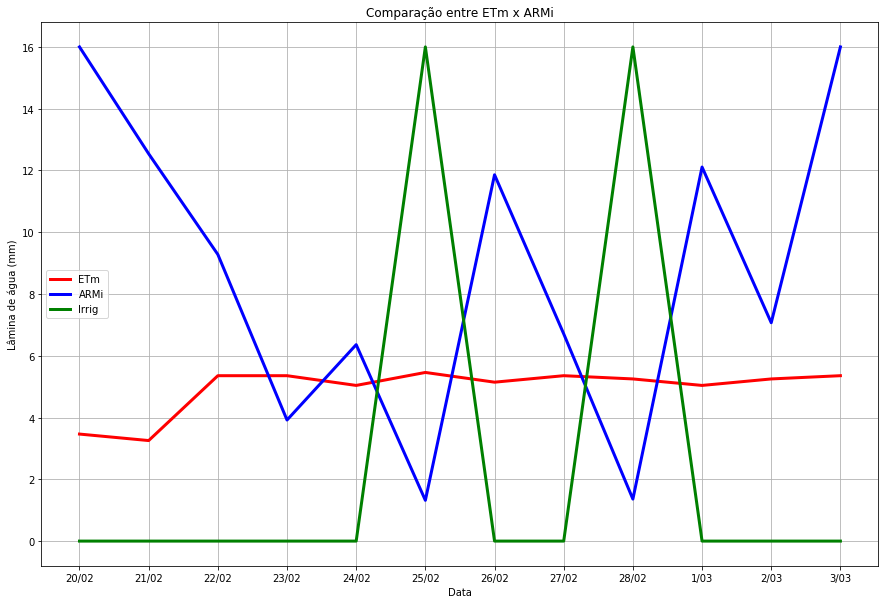

In [44]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.plot(tabela['Data'], tabela['ETm'], color='red', label='ETm', linewidth=3.0)
plt.plot(tabela['Data'], tabela['ARMi'], color='blue', label='ARMi', linewidth=3.0)
plt.plot(tabela['Data'], tabela['Irrig'], color='green', label='Irrig', linewidth=3.0)

plt.xlabel('Data')
plt.ylabel('Lâmina de água (mm)')
plt.title('Comparação entre ETm x ARMi')
plt.legend(loc='center left')
plt.grid(True)
plt.show()

## Salvando a tabela num arquivo excel

In [16]:
tabela.to_excel('balanço_hidrico.xlsx')